In [1]:
## cetin ilhan kaya phys710 exam Question 1 Task 1

import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

dev = qml.device('default.qubit', wires=1)

In [2]:
# variational ansatz
def circuit(params, wires=0):
    qml.RX(params[0], wires=wires)
    qml.RY(params[1], wires=wires)
    

In [3]:
# define single-qubit hamiltonian
coeffs = [1,1]
obs = [qml.PauliX(0), qml.PauliZ(0)]
H = qml.Hamiltonian(coeffs, obs) #$ H = \sigma_x + \sigma_z $

# define cost function
@qml.qnode(dev)
def cost_funct(params):
    circuit(params)
    return qml.expval(H)

In [4]:
# fix initial parameters for comparison
init_params = np.array([3.97507603, 3.00854038], requires_grad=True)
print("Parameters:", init_params)

max_iter = 500
conv_tol = 1e-06
step_size = 0.01

Parameters: [3.97507603 3.00854038]


In [5]:
# gradient-descent optimizer
gde_optimizer = qml.GradientDescentOptimizer(stepsize=step_size)
theta_gde = init_params
gde_cost = [cost_funct(theta_gde)]
angle_gde = [theta_gde]
for i in range(max_iter):
    theta_gde, last_cost = gde_optimizer.step_and_cost(cost_funct, theta_gde)
    gde_cost.append(cost_funct(theta_gde))
    angle_gde.append(theta_gde)
    
    conv = np.abs(gde_cost[-1] - last_cost)
    if i%10==0:
        print(f'step = {i}, cost function = {gde_cost[-1]:.8f}')
    if conv <= conv_tol:
        break

print('\n' f'final value of the cost function = {gde_cost[-1]:.8f}')
print('\n' f'optimal value of the first circuit parameter = ' + str(angle_gde[-1][0]))
print('\n' f'optimal value of the second circuit parameter = ' + str(angle_gde[-1][1]))

step = 0, cost function = 0.56743624
step = 10, cost function = 0.47335099
step = 20, cost function = 0.38709233
step = 30, cost function = 0.31048277
step = 40, cost function = 0.24420954
step = 50, cost function = 0.18798179
step = 60, cost function = 0.14079686
step = 70, cost function = 0.10121563
step = 80, cost function = 0.06758408
step = 90, cost function = 0.03817867
step = 100, cost function = 0.01128048
step = 110, cost function = -0.01480376
step = 120, cost function = -0.04175219
step = 130, cost function = -0.07124890
step = 140, cost function = -0.10499504
step = 150, cost function = -0.14468954
step = 160, cost function = -0.19195848
step = 170, cost function = -0.24821576
step = 180, cost function = -0.31444953
step = 190, cost function = -0.39095468
step = 200, cost function = -0.47706980
step = 210, cost function = -0.57101432
step = 220, cost function = -0.66993027
step = 230, cost function = -0.77018594
step = 240, cost function = -0.86789981
step = 250, cost funct

In [6]:
# QNG
qng_optimizer = qml.QNGOptimizer(stepsize=step_size, approx='block-diag')
theta_qng = init_params
qng_cost = [cost_funct(theta_qng)]
angle_qng = [theta_qng]
for i in range(max_iter):
    theta_qng, last_cost = qng_optimizer.step_and_cost(cost_funct, theta_qng)
    qng_cost.append(cost_funct(theta_qng))
    angle_qng.append(theta_qng)
    
    conv = np.abs(qng_cost[-1] - last_cost)
    if i%10==0:
        print(f'step = {i}, cost function = {qng_cost[-1]:.8f}')
    if conv <= conv_tol:
        break
print('\n' f'final value of the cost function = {qng_cost[-1]:.8f}')
print('\n' f'optimal value of the first circuit parameter = ' + str(angle_qng[-1][0]))
print('\n' f'optimal value of the second circuit parameter = ' + str(angle_qng[-1][1]))

step = 0, cost function = 0.51052556
step = 10, cost function = -0.25576311
step = 20, cost function = -0.90729965
step = 30, cost function = -1.23320451
step = 40, cost function = -1.35504644
step = 50, cost function = -1.39547232
step = 60, cost function = -1.40833787
step = 70, cost function = -1.41237741
step = 80, cost function = -1.41364035
step = 90, cost function = -1.41403467
step = 100, cost function = -1.41415774
step = 110, cost function = -1.41419614

final value of the cost function = -1.41420585

optimal value of the first circuit parameter = 3.1443664622443213

optimal value of the second circuit parameter = 0.7871891271584841


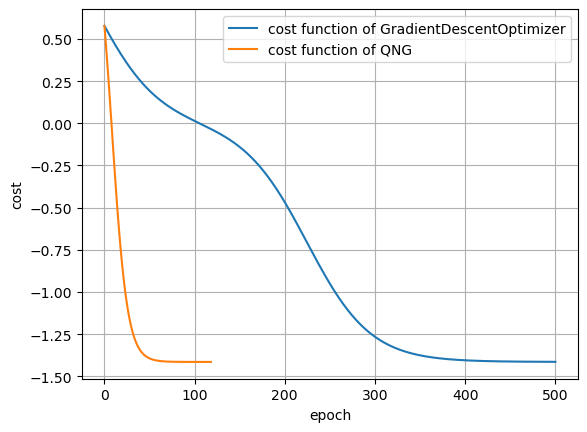

In [7]:
def plot(gde_cost):
    plt.plot(gde_cost, label='cost function of GradientDescentOptimizer')
    plt.plot(qng_cost, label='cost function of QNG')
    plt.xlabel('epoch')
    plt.ylabel('cost')
    plt.legend()
    plt.grid(True)
plot(gde_cost)